<h1 style="font-size: 1.8rem; font-weight: bold">Module 1 - Topic 3: Dijkstra's Shortest Path Algorithm</h1>
<p style="margin-top: 5px; margin-bottom: 5px;">Monash University Australia</p>
<p style="margin-top: 5px; margin-bottom: 5px;">ITO 4001: Foundations of Computing</p>
<p style="margin-top: 5px; margin-bottom: 5px;">Jupyter Notebook by: Tristan Sim Yook Min</p>

---

### **Dijkstra's Shortest Path Alogrithm**

Dijkstra's Shortest Path Algorithm is a Single Source Shortest Path Alogrithm used to find the Shortest Path to a destination node in a graph. The Edges of the Graph must have non-negative weights. One common application using Dijkstra Algorithm are for example network routing protocals like Open-Shortest Path First (OSPF) to find the best routes between routers. 

### **Constraints of Dijkstra's Algorithm**

Dijkstra's algorithm **requires non-negative edge weights** to function correctly. This fundamental constraint exists because the algorithm assumes that once a node is visited, its shortest distance cannot be improved further—an assumption that fails in the presence of negative weights. For graphs containing negative edges, the **Bellman-Ford algorithm** should be used instead. Additionally, Dijkstra's algorithm cannot handle **negative cycles** (circuits where the sum of edge weights is negative), as these would allow infinitely decreasing path lengths, preventing convergence to a shortest path solution.

#### **Dijkstra's Algorithm (Eager) Space & Time Complexity**

| Aspect | Complexity | Notes |
|--------|------------|-------|
| **Time Complexity** | $O(E \log V)$ | - With binary heap priority queue<br>- E is the number of edges<br>- V is the number of vertices |
| **Space Complexity** | $O(V)$ | - Stores distance array and priority queue<br>- Each vertex appears at most once in the queue |

---


### **Lazy Dijkstra's Algorithm Implementation**

The reason why this is called the 'Lazy' implementation is because it does not search and update the node's priority in the priority queue. Instead, it adds nodes to the priority queue each time they are visited with a better distance, creating duplicates. This version is easier to implement and more efficient in some scenarios due to its simplicity, particularly when using standard priority queue implementations that don't efficiently support the decrease-key operation. Due to these **duplicate key-value pairs**, it is **inefficient for dense graphs**. It has a time complexity of $O(E log E)$ and a space complexity of $O(E)$, where $E$ is the number of edges, as compared to the eager implementation's $O(E log V)$ time complexity, where $V$ is the number of vertices.

It has a time and space complexity of. 

(Source Material: William Fest (https://www.youtube.com/watch?v=pSqmAO-m7Lk&t=297s) & Monash University )

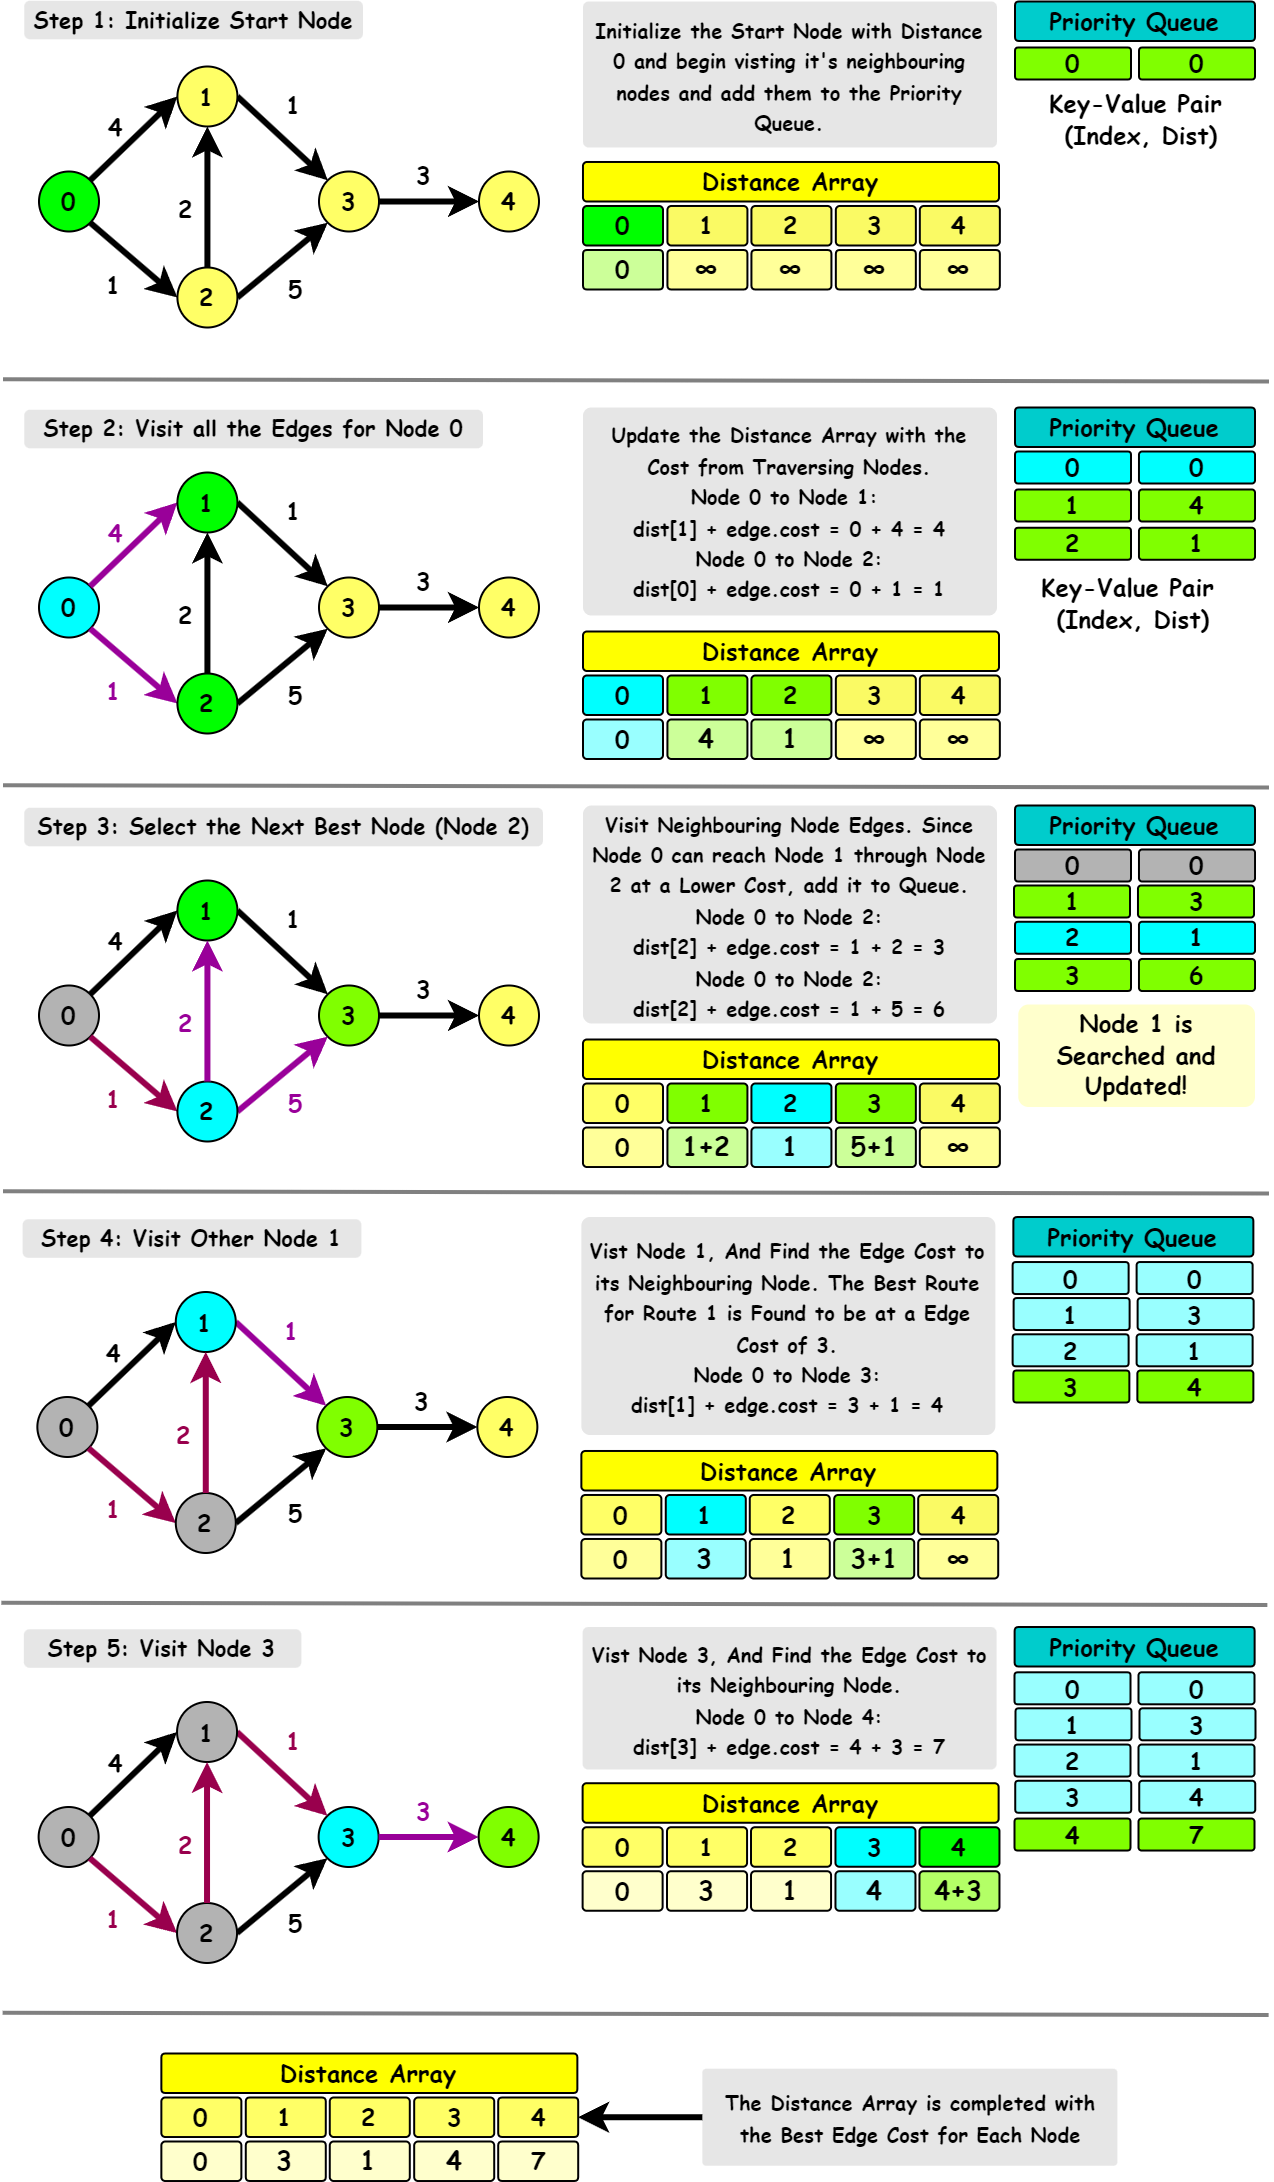

In [2]:
import heapq

# Example graph from the image (node: [(neighbor, weight)])
graph = {
    0: [(1, 4), (2, 1)],
    1: [(3, 1)],
    2: [(1, 2), (3, 5)],
    3: [(4, 3)],
    4: []
}

def lazy_dijkstra(graph, start, end):
    # Initialize distances with infinity for all nodes except start
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    
    # Initialize priority queue with (distance, node) tuples
    # The priority queue will be sorted by distance
    priority_queue = [(0, start)]
    
    # Keep track of predecessors to reconstruct the path
    predecessors = {node: None for node in graph}
    
    # Set to keep track of processed nodes
    processed = set()
    
    while priority_queue:
        # Get the node with the smallest distance
        current_distance, current_node = heapq.heappop(priority_queue)
        
        # If we've reached the end node, we're done
        if current_node == end:
            # Reconstruct the path
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = predecessors[current_node]
            path.reverse()  # Reverse to get the path from start to end
            return distances[end], path
        
        # Skip if we've processed this node already
        if current_node in processed:
            continue
            
        # Mark as processed
        processed.add(current_node)
        
        # If this is a stale entry (we found a better path already), skip
        if current_distance > distances[current_node]:
            continue
        
        # Check all neighbors
        for neighbor, weight in graph[current_node]:
            # Calculate distance to neighbor through current node
            distance = current_distance + weight
            
            # If we found a better path, update and add to queue
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))
                # Note: We don't update existing entries in the queue,
                # which is what makes this the "lazy" implementation
    
    # If we get here, there's no path to the end node
    return float('infinity'), []

# Modified the function to return distances as well
def lazy_dijkstra(graph, start, end):
    # Initialize distances with infinity for all nodes except start
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    
    # Initialize priority queue with (distance, node) tuples
    # The priority queue will be sorted by distance
    priority_queue = [(0, start)]
    
    # Keep track of predecessors to reconstruct the path
    predecessors = {node: None for node in graph}
    
    # Set to keep track of processed nodes
    processed = set()
    
    while priority_queue:
        # Get the node with the smallest distance
        current_distance, current_node = heapq.heappop(priority_queue)
        
        # If we've reached the end node, we're done
        if current_node == end:
            # Reconstruct the path
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = predecessors[current_node]
            path.reverse()  # Reverse to get the path from start to end
            return distances[end], path, distances
        
        # Skip if we've processed this node already
        if current_node in processed:
            continue
            
        # Mark as processed
        processed.add(current_node)
        
        # If this is a stale entry (we found a better path already), skip
        if current_distance > distances[current_node]:
            continue
        
        # Check all neighbors
        for neighbor, weight in graph[current_node]:
            # Calculate distance to neighbor through current node
            distance = current_distance + weight
            
            # If we found a better path, update and add to queue
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))
                # Note: We don't update existing entries in the queue,
                # which is what makes this the "lazy" implementation
    
    # If we get here, there's no path to the end node
    return float('infinity'), [], distances

# Run the algorithm for the example in the image
shortest_distance, shortest_path, distances = lazy_dijkstra(graph, 0, 4)

print(f"Shortest distance from 0 to 4: {shortest_distance}")
print(f"Shortest path: {shortest_path}")

# Print the state of distances after the algorithm completes
print("Final distances array:")
for node in sorted(graph.keys()):
    print(f"Node {node}: {distances[node]}")

Shortest distance from 0 to 4: 7
Shortest path: [0, 2, 1, 3, 4]
Final distances array:
Node 0: 0
Node 1: 3
Node 2: 1
Node 3: 4
Node 4: 7


---


### **Dijkstra's Algorithm (Eager Implementation)**

In the Eager Implementation of the Dijkstra's Algorithm, it utititlizes a **Indexed Priority Queue** and **does not create duplicate key-value pairs for each node**. Instead, if the node has been visited before, it will update the node's edge cost by searching the **Indexed Priority Queue** and updating the new cost to the **key-value pair**. 

(Source Material: William Fest (https://www.youtube.com/watch?v=pSqmAO-m7Lk&t=297s) & Monash University )

### **Indexed Priority Queue (Data Structure)**

An Indexed Priority Queue helps improve the lookup time for Dijkstra's Algorithm, as it needs to efficiently reference nodes to update edge costs. It is a data structure that consists of a Heap, a Heap Array, and Hash Tables. It allows for quick searches of values either based on the array index, through the 'Node ID' using the Position Map, or through the 'Heap Index' using the Inverse Hash Map.

##### **Heap**

A Heap is a **Tree-Based** Data Structure where ach parent node is either always smaller (min-heap) or always larger (max-heap) than its children, ensuring the minimum or maximum is always at the root for efficient access. If a new minimum value is introduced for example, it would need to bubble up to the root position.

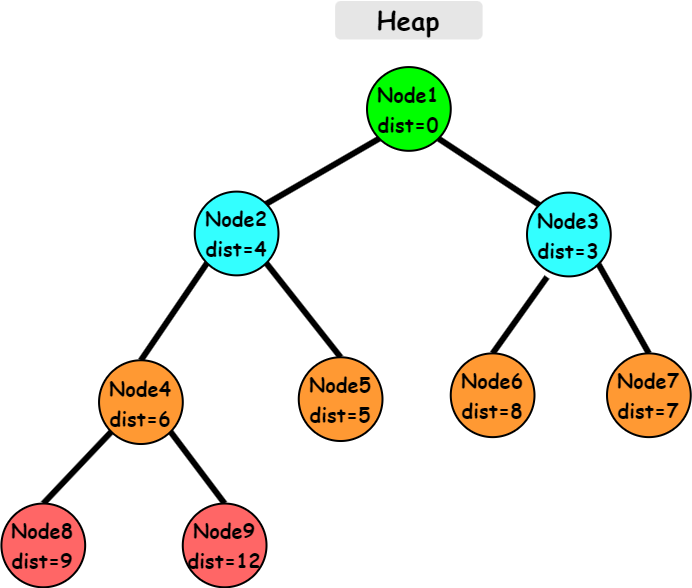

##### **Heap Array**
The heap array stores the distance values in the position determined by the binary heap structure:

| Index | Value | Node  |
|-------|-------|-------|
| 0     | 0     | Node1 |
| 1     | 4     | Node2 |
| 2     | 3     | Node3 |
| 3     | 6     | Node4 |
| 4     | 5     | Node5 |
| 5     | 8     | Node6 |
| 6     | 7     | Node7 |
| 7     | 9     | Node8 |
| 8     | 12    | Node9 |

##### **Position Map (Node → Heap Index)**
This hash table maps from each node to its position in the heap array:

| Node ID | Heap Index |
|---------|------------|
| Node1   | 0          |
| Node2   | 1          |
| Node3   | 2          |
| Node4   | 3          |
| Node5   | 4          |
| Node6   | 5          |
| Node7   | 6          |
| Node8   | 7          |
| Node9   | 8          |

#### **Inverse Map (Heap Index → Node)**
This hash table maps from positions in the heap array back to the nodes:

| Heap Index | Node ID |
|------------|---------|
| 0          | Node1   |
| 1          | Node2   |
| 2          | Node3   |
| 3          | Node4   |
| 4          | Node5   |
| 5          | Node6   |
| 6          | Node7   |
| 7          | Node8   |
| 8          | Node9   |




#### **Algorithm Overview (Note the Key Values Pairs are Updated instead of Duplicated)**

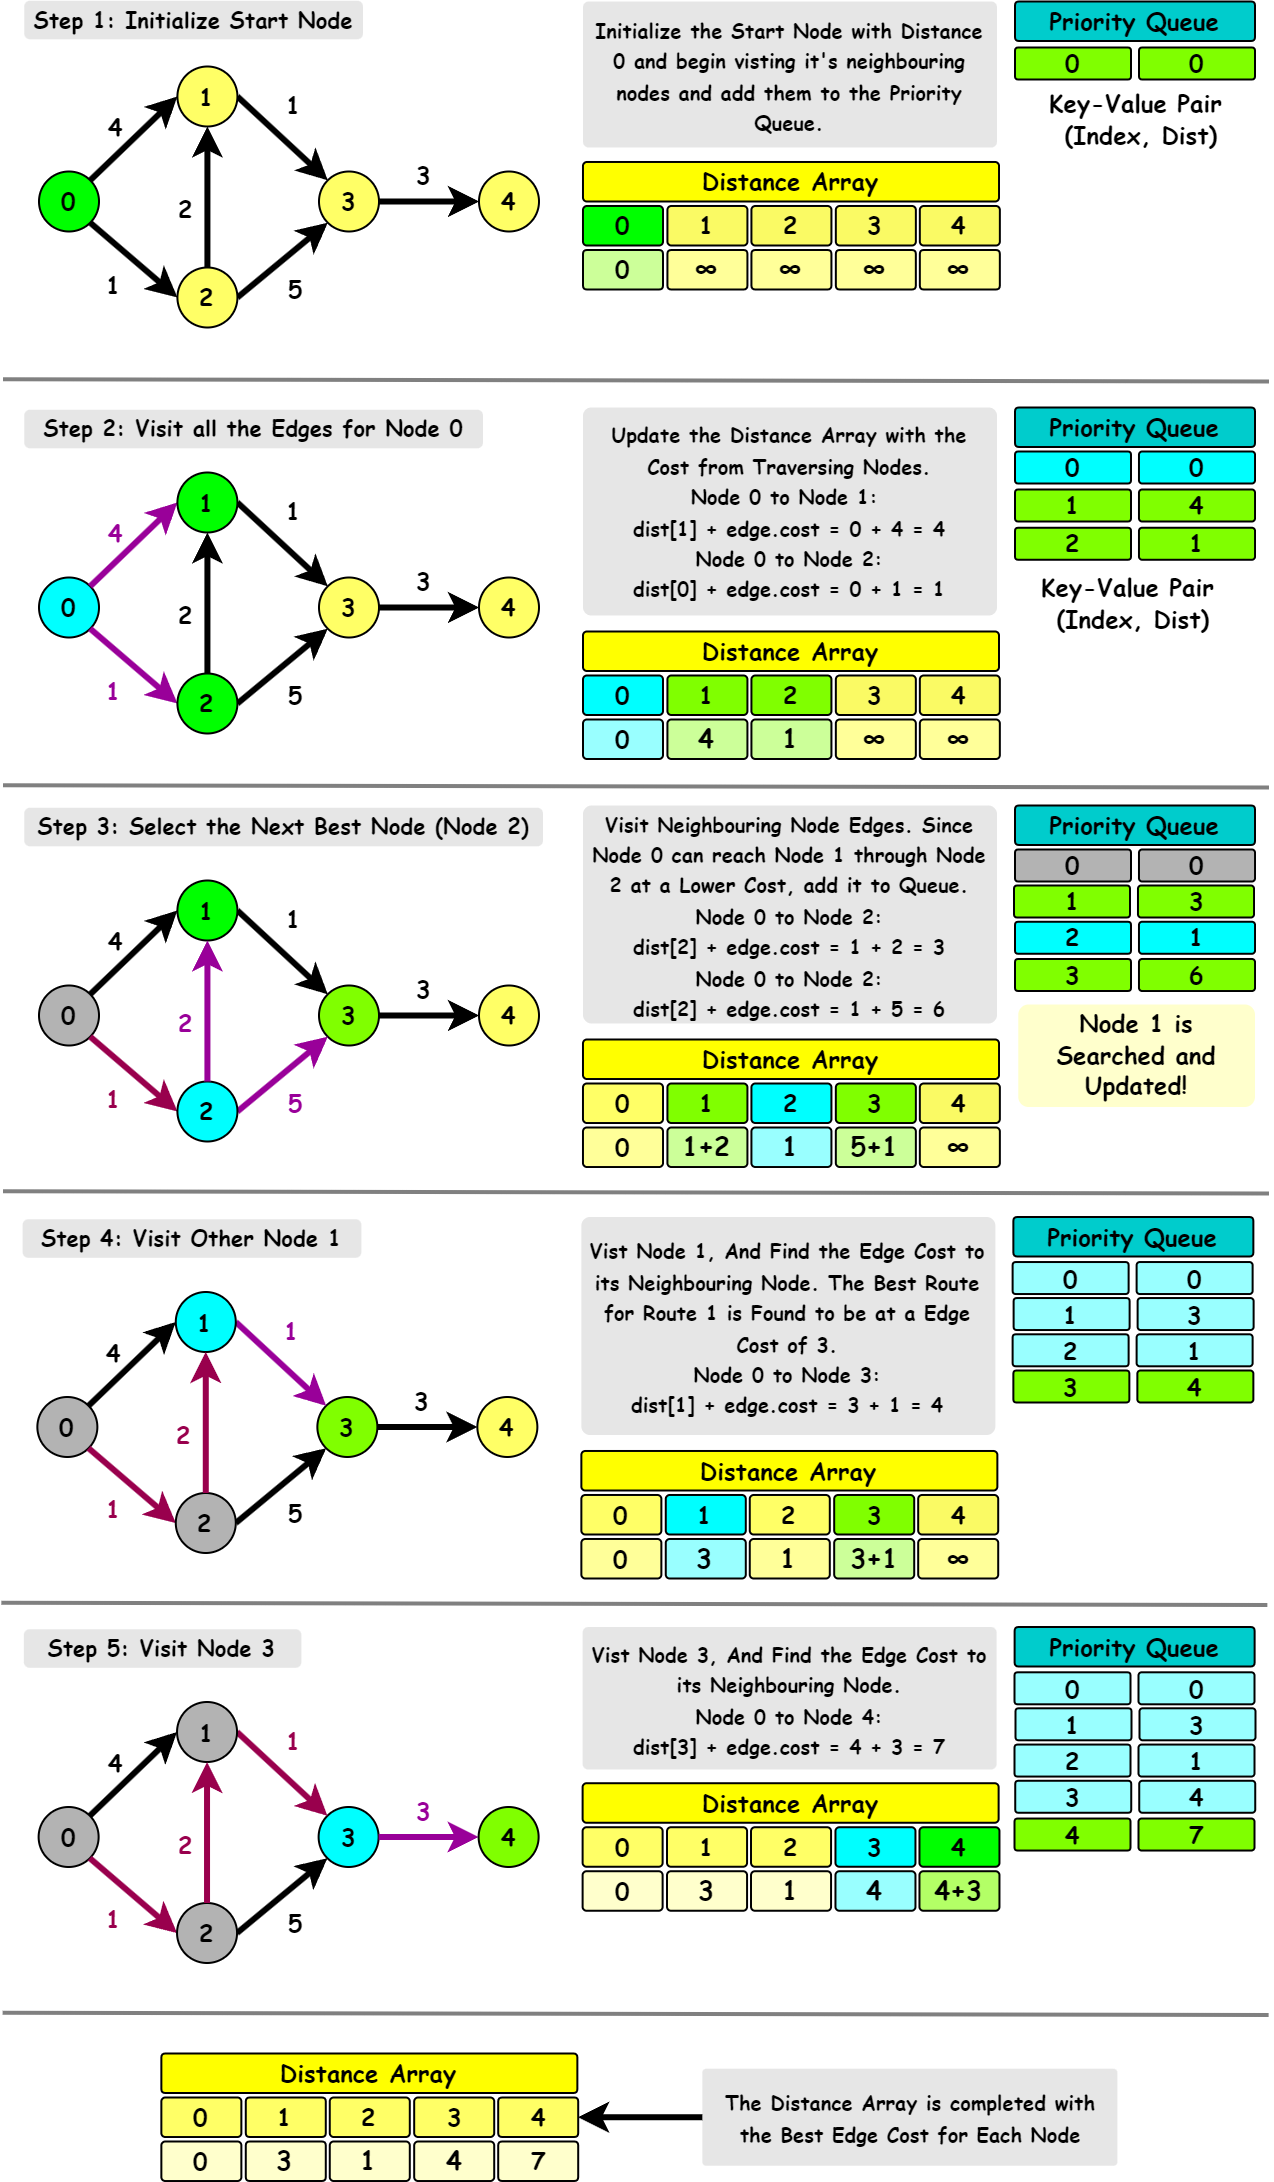

In [ ]:
import heapq

# Example graph from the image (node: [(neighbor, weight)])
graph = {
    0: [(1, 4), (2, 1)],
    1: [(3, 1)],
    2: [(1, 2), (3, 5)],
    3: [(4, 3)],
    4: []
}

def eager_dijkstra(graph, start_node):
    """
    Implementation of eager Dijkstra's algorithm to find shortest paths from start_node to all other nodes.
    
    Args:
        graph (dict): A dictionary representing the graph where keys are nodes
                     and values are lists of (neighbor, weight) tuples
        start_node: The starting node
        
    Returns:
        distances (dict): Dictionary of shortest distances from start_node to all other nodes
        predecessors (dict): Dictionary of predecessors in the shortest path
    """
    # Initialize distance array with infinity for all nodes except start_node
    distances = {node: float('infinity') for node in graph}
    distances[start_node] = 0
    
    # Initialize predecessor dictionary to track the best path
    predecessors = {node: None for node in graph}
    
    # Priority queue for nodes to visit (distance, node)
    # Using a min-heap priority queue
    priority_queue = [(0, start_node)]
    
    # To keep track of visited/processed nodes
    visited = set()
    
    print(f"Step 1: Initialize Start Node {start_node}")
    print(f"  Distance array: {distances}")
    print(f"  Priority queue: {priority_queue}\n")
    
    step = 2
    
    while priority_queue:
        # Get the node with the smallest distance from the priority queue
        current_distance, current_node = heapq.heappop(priority_queue)
        
        # Skip if we've already processed this node
        if current_node in visited:
            continue
            
        # Mark the current node as visited
        visited.add(current_node)
        
        print(f"Step {step}: Visit node {current_node}")
        
        # Explore all neighbors of the current node
        for neighbor, weight in graph[current_node]:
            # Skip if the neighbor has already been processed
            if neighbor in visited:
                continue
                
            # Calculate potential new distance to neighbor
            distance = distances[current_node] + weight
            
            # If we found a better path, update the distance
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                predecessors[neighbor] = current_node
                
                # Add to priority queue with updated distance
                heapq.heappush(priority_queue, (distance, neighbor))
        
        print(f"  Distance array: {distances}")
        print(f"  Priority queue: {priority_queue}\n")
        
        step += 1
    
    return distances, predecessors

def reconstruct_path(predecessors, start_node, end_node):
    """
    Reconstruct the shortest path from start_node to end_node using the predecessors dictionary.
    
    Args:
        predecessors (dict): Dictionary of predecessors in the shortest path
        start_node: The starting node
        end_node: The ending node
        
    Returns:
        path (list): List of nodes in the shortest path from start_node to end_node
    """
    path = []
    current_node = end_node
    
    while current_node is not None:
        path.append(current_node)
        current_node = predecessors[current_node]
        
    # Reverse the path to get it from start_node to end_node
    return path[::-1]

# Example usage
if __name__ == "__main__":
    # Run Dijkstra's algorithm
    start_node = 0
    distances, predecessors = eager_dijkstra(graph, start_node)
    
    # Display the final results only
    print("\nFinal Results:")
    print("Shortest distances from node", start_node)
    for node, distance in distances.items():
        print(f"  To node {node}: {distance}")
    
    # Show shortest path to node 4
    end_node = 4
    path = reconstruct_path(predecessors, start_node, end_node)
    print(f"\nShortest path from node {start_node} to node {end_node}:", ' -> '.join(map(str, path)))
    print(f"Total distance: {distances[end_node]}")

Step 1: Initialize Start Node 0
  Distance array: {0: 0, 1: inf, 2: inf, 3: inf, 4: inf}
  Priority queue: [(0, 0)]

Step 2: Visit node 0
  Distance array: {0: 0, 1: 4, 2: 1, 3: inf, 4: inf}
  Priority queue: [(1, 2), (4, 1)]

Step 3: Visit node 2
  Distance array: {0: 0, 1: 3, 2: 1, 3: 6, 4: inf}
  Priority queue: [(3, 1), (4, 1), (6, 3)]

Step 4: Visit node 1
  Distance array: {0: 0, 1: 3, 2: 1, 3: 4, 4: inf}
  Priority queue: [(4, 1), (6, 3), (4, 3)]

Step 5: Visit node 3
  Distance array: {0: 0, 1: 3, 2: 1, 3: 4, 4: 7}
  Priority queue: [(6, 3), (7, 4)]

Step 6: Visit node 4
  Distance array: {0: 0, 1: 3, 2: 1, 3: 4, 4: 7}
  Priority queue: []


Final Results:
Shortest distances from node 0
  To node 0: 0
  To node 1: 3
  To node 2: 1
  To node 3: 4
  To node 4: 7

Shortest path from node 0 to node 4: 0 -> 2 -> 1 -> 3 -> 4
Total distance: 7
